# Flight efficiency map

Load packages, load data

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import pandas as pd
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
from cmocean import cm as cmo
from matplotlib.patches import Circle
from matplotlib.collections import PatchCollection

In [3]:
airports = pd.read_csv("../data/airport.csv")
airports

,iatacode,country,default_locale,latitude,locationtype,longitude,nameenglish,namegerman,regioncode,timezone,activesoftconex,validiatacode,id
0,BUH,ROU,en,44.500000,AIRPORT ...,26.083333,Bucharest Metropolitan Aera,Bukarest,EU2,NaN,True,True,346
1,LZS,AUT,en,14.291100,AIRPORT ...,48.290600,Linz Airport,Linz,EU1,NaN,True,True,1224
2,MIL,ITA,en,45.633333,AIRPORT ...,8.733333,Milan Metropolitan Aera,Mailand,EU1,NaN,True,True,1291
3,MOW,RUS,en,55.969444,AIRPORT ...,37.416667,Moscow Metropolitan Aera,Moskau,EU2,NaN,True,True,1329
4,ROM,ITA,en,41.799722,AIRPORT ...,12.234167,Rome Metropolitan Aera,Rom,EU1,NaN,True,True,1696
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9992,DLC,CHN,en,38.965698,AIRPORT ...,121.539001,Dalian,NaN,AS4,NaN,True,True,547
9993,TNH,CHN,en,42.253887,AIRPORT ...,125.703331,Tonghua Liuhe,NaN,AS4,NaN,True,True,1962
9994,SHE,CHN,en,41.639801,AIRPORT ...,123.483002,Shenyang,NaN,AS4,NaN,True,True,1778
9995,YNJ,CHN,en,42.882801,AIRPORT ...,129.451004,Yanji,NaN,AS4,NaN,True,True,2212


In [4]:
flights = pd.read_csv("../data/by_route_airline.csv")
flights

,departure,arrival,airlinename,aircraft_types,avg_distance,flown_distance,gcd,flights,passengers,seats,average_load,co2,gco2_pax_km
0,SGN,HAN,Vietnam Airlines,5,1261.547796,1.154569e+07,1.063049e+07,9152,1.993998e+06,2447017,0.814869,191365.676340,83.568282
1,HAN,SGN,Vietnam Airlines,5,1261.547796,1.092879e+07,1.006249e+07,8663,1.966054e+06,2412725,0.814869,195266.817616,85.856883
2,CJU,GMP,Asiana Airlines,5,501.253150,5.223058e+06,4.702058e+06,10420,1.782774e+06,2123733,0.839453,100145.929946,123.192530
3,GMP,CJU,Asiana Airlines,5,501.253150,5.105765e+06,4.596465e+06,10186,1.719632e+06,2048514,0.839453,96146.969851,122.799097
4,FUK,HND,All Nippon Airways,9,982.357327,8.414873e+06,7.558273e+06,8566,1.708145e+06,2438270,0.700556,161111.234068,110.055579
...,...,...,...,...,...,...,...,...,...,...,...,...,...
81839,BOO,OSL,Wideroe's Flyveselskap,1,903.632067,9.036321e+02,8.036321e+02,1,2.521278e+01,39,0.646481,3.184374,157.161474
81840,DRW,TCA,Airnorth Regional,1,977.769135,9.777691e+02,8.777691e+02,1,2.355192e+01,30,0.785064,3.052329,147.647023
81841,TCA,DRW,Airnorth Regional,1,977.769135,9.777691e+02,8.777691e+02,1,2.355192e+01,30,0.785064,3.052329,147.647023
81842,TJN,PPT,Air Tahiti,1,905.066029,9.050660e+02,8.050660e+02,1,2.111117e+01,30,0.703706,2.493229,146.696042


In [ ]:

sample = range(len(flights))                    # all flights or subsample to test?
sample2 = np.random.shuffle(np.copy(sample))    # randomize the order for plotting

In [6]:
latitude_departure = np.array([airports[airports["iatacode"] == DEP]["latitude"].iloc[0] for DEP in flights["departure"][sample]])
longitude_departure = np.array([airports[airports["iatacode"] == DEP]["longitude"].iloc[0] for DEP in flights["departure"][sample]])

latitude_arrival = np.array([airports[airports["iatacode"] == ARR]["latitude"].iloc[0] for ARR in flights["arrival"][sample]])
longitude_arrival = np.array([airports[airports["iatacode"] == ARR]["longitude"].iloc[0] for ARR in flights["arrival"][sample]])

In [7]:
efficiency = flights["gco2_pax_km"][sample]

/var/folders/rq/g428p_c576b5x1xzwsc9gfv80000gp/T/ipykernel_6487/364185601.py:18: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


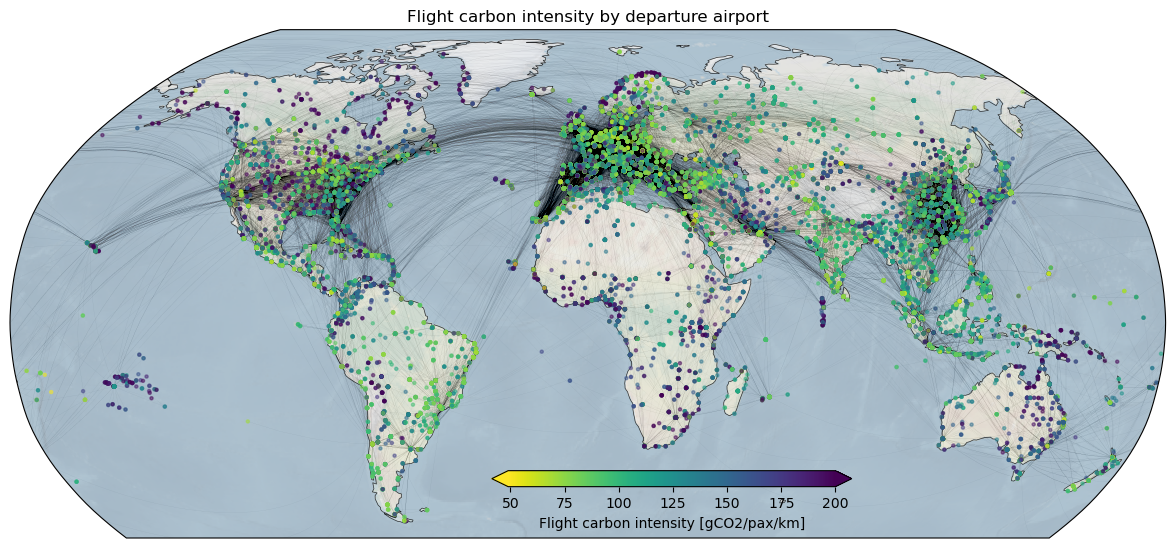

In [8]:
fig = plt.figure(figsize=(12, 8))
ax = plt.subplot2grid((3, 3), (0, 0), colspan=3, rowspan=2, projection=ccrs.Robinson())
cax = fig.add_axes([0.42, 0.41, 0.3, 0.02])

# # USA
# ax2 = plt.subplot2grid((3, 3), (2, 0), projection=ccrs.LambertConformal(central_longitude=-100))
# ax2.set_extent([-120, -75, 0, 60], crs=ccrs.Geodetic())

# # EUROPE
# ax3 = plt.subplot2grid((3, 3), (2, 1), projection=ccrs.LambertConformal(central_longitude=0))
# ax3.set_extent([-13, 36, 40, 64], crs=ccrs.Geodetic())

# # EAST ASIA
# ax4 = plt.subplot2grid((3, 3), (2, 2), projection=ccrs.LambertConformal(central_longitude=90))
# ax4.set_extent([90, 120, 10, 60], crs=ccrs.Geodetic())


plt.tight_layout()

# ax.set_global()
ax.set_extent([-180, 180, -60, 90])
ax.add_feature(cfeature.OCEAN,facecolor="0.8",zorder=-2)
ax.add_feature(cfeature.LAND,facecolor="0.9", zorder=-1)
# ax.add_feature(cfeature.OCEAN,facecolor="#4381a2",zorder=-2)
# ax.add_feature(cfeature.LAND,facecolor="#63a1c2", zorder=-1)
ax.stock_img(alpha=0.4)
ax.coastlines(color="k", alpha=0.8, lw=0.5, zorder=0)

ax.plot(np.vstack((longitude_departure, longitude_arrival)),
        np.vstack((latitude_departure, latitude_arrival)), color="k", lw=.1, alpha=0.05, transform=ccrs.Geodetic(), zorder=.1)

h = ax.scatter(0, 0, 0, 0, vmin=49, vmax=200, alpha=1, cmap="viridis_r", visible=False)
ax.scatter(longitude_departure, latitude_departure, 5, efficiency,
               vmin=50, vmax=200, alpha=0.5, cmap="viridis_r", transform=ccrs.PlateCarree())

# ax2.stock_img(alpha=0.4)
# ax2.coastlines(color="k", alpha=0.8, lw=0.5, zorder=0)
# ax2.scatter(longitude_departure, latitude_departure, 5, efficiency,
#                vmin=50, vmax=200, alpha=0.5, cmap="viridis_r", transform=ccrs.PlateCarree())

# ax3.stock_img(alpha=0.4)
# ax3.coastlines(color="k", alpha=0.8, lw=0.5, zorder=0)
# ax3.scatter(longitude_departure, latitude_departure, 5, efficiency,
#                vmin=50, vmax=200, alpha=0.5, cmap="viridis_r", transform=ccrs.PlateCarree())

# ax4.stock_img(alpha=0.4)
# ax4.coastlines(color="k", alpha=0.8, lw=0.5, zorder=0)
# ax4.scatter(longitude_departure, latitude_departure, 5, efficiency,
#                vmin=50, vmax=200, alpha=0.5, cmap="viridis_r", transform=ccrs.PlateCarree())

fig.colorbar(h, cax=cax, orientation='horizontal', label="Flight carbon intensity [gCO2/pax/km]", extend="both")

ax.set_title("Flight carbon intensity by departure airport")
plt.show()

In [346]:
flights

,departure,arrival,airlinename,aircraft_types,avg_distance,flown_distance,gcd,flights,passengers,seats,average_load,co2,gco2_pax_km
0,SGN,HAN,Vietnam Airlines,5,1261.547796,1.154569e+07,1.063049e+07,9152,1.993998e+06,2447017,0.814869,191365.676340,83.568282
1,HAN,SGN,Vietnam Airlines,5,1261.547796,1.092879e+07,1.006249e+07,8663,1.966054e+06,2412725,0.814869,195266.817616,85.856883
2,CJU,GMP,Asiana Airlines,5,501.253150,5.223058e+06,4.702058e+06,10420,1.782774e+06,2123733,0.839453,100145.929946,123.192530
3,GMP,CJU,Asiana Airlines,5,501.253150,5.105765e+06,4.596465e+06,10186,1.719632e+06,2048514,0.839453,96146.969851,122.799097
4,FUK,HND,All Nippon Airways,9,982.357327,8.414873e+06,7.558273e+06,8566,1.708145e+06,2438270,0.700556,161111.234068,110.055579
...,...,...,...,...,...,...,...,...,...,...,...,...,...
81839,BOO,OSL,Wideroe's Flyveselskap,1,903.632067,9.036321e+02,8.036321e+02,1,2.521278e+01,39,0.646481,3.184374,157.161474
81840,DRW,TCA,Airnorth Regional,1,977.769135,9.777691e+02,8.777691e+02,1,2.355192e+01,30,0.785064,3.052329,147.647023
81841,TCA,DRW,Airnorth Regional,1,977.769135,9.777691e+02,8.777691e+02,1,2.355192e+01,30,0.785064,3.052329,147.647023
81842,TJN,PPT,Air Tahiti,1,905.066029,9.050660e+02,8.050660e+02,1,2.111117e+01,30,0.703706,2.493229,146.696042


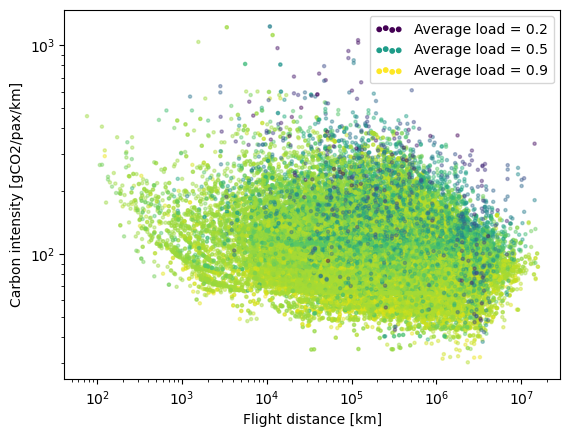

In [415]:
fig, axx = plt.subplots(1,1)
axx.scatter(np.array(flights["flown_distance"])[sample2], np.array(efficiency)[sample2], 5, c=np.log(np.array(flights["average_load"])[sample2]), alpha=.4, cmap="viridis")

cmap = plt.get_cmap("viridis")
axx.scatter(0, 0, 10, color=cmap(0.0), label="Average load = 0.2")
axx.scatter(0, 0, 10, color=cmap(0.2+0.7/2), label="Average load = 0.5")
axx.scatter(0, 0, 10, color=cmap(1.0), label="Average load = 0.9")

axx.set_xscale('log')
axx.set_yscale('log')

axx.set_xlabel("Flight distance [km]")
axx.set_ylabel("Carbon intensity [gCO2/pax/km]")
axx.legend(scatterpoints=4)
plt.show()